In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import torch
import pickle
from pymoo.indicators.hv import HV
from pymoo.config import Config
from metrics import mean_Euclidean_dist
Config.warnings['not_compiled'] = False
from pymoo.util.ref_dirs import get_reference_directions
from partitioning import sampling_vector_randomly, sampling_vector_evenly
from pymoo.problems import get_problem as get_prob_pymoo
from problem import get_problem
from pymoo.problems import get_problem as get_problem2

In [2]:
def front_truth(problem_name):
    if problem_name == "DTLZ2":
        n_sample = 20
        r = 1
        u = np.linspace(0, np.pi/2, n_sample)
        v = np.linspace(0, np.pi/2, n_sample)
        a = np.expand_dims(r*np.outer(np.cos(u), np.sin(v)).flatten(), axis=1)
        b = np.expand_dims(r*np.outer(np.sin(u), np.sin(v)).flatten(), axis=1)
        c = np.expand_dims(r*np.outer(np.ones(np.size(u)), np.cos(v)).flatten(), axis=1)
        return np.hstack((a,b,c))

In [3]:
log_dir = "result_weight/ablation_DTLZ2_beta"
problem = get_problem("DTLZ2")
ref_point = problem.nadir_point 
ref_point = [1.1 * x  for x in ref_point]
hv = HV(ref_point=np.array(ref_point))
truth_pareto = front_truth("DTLZ2")
max_HV = hv(truth_pareto)

pref_vec_test = sampling_vector_evenly(3, 300)

f_truth =  get_problem2("dtlz2").pareto_front(pref_vec_test)

color_code = ['black', 'red', 'blue', 'green', 'pink', 'brown', 'gray', 'olive', 'orange', 'cyan', 'purple']

n_evaluation = 420
start = 0
stop = 11
step = 1
save = 0

In [4]:

x_axis = []
y_axis = []

for beta in range(start, stop, step):
    Y_solution = np.load(f'{log_dir}/evaluation_DTLZ2_Y_6_2_stage_{beta}_controllable.npy')[:n_evaluation]
    x_axis.append(beta)
    HV_score = np.log(np.clip(max_HV - hv(Y_solution), a_min=1e-14, a_max=max_HV))
    y_axis.append(HV_score)
    
x_axis2 = []
y_axis2 = []

for beta in range(start, stop, step):
    Y_solution = np.load(f'{log_dir}/front_DTLZ2_6_2_stage_{beta}_controllable.npy')[:40]
    x_axis2.append(beta)
    y_axis2.append(mean_Euclidean_dist(f_truth, Y_solution[-1]))


/tmp/ipykernel_13314/2577997115.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


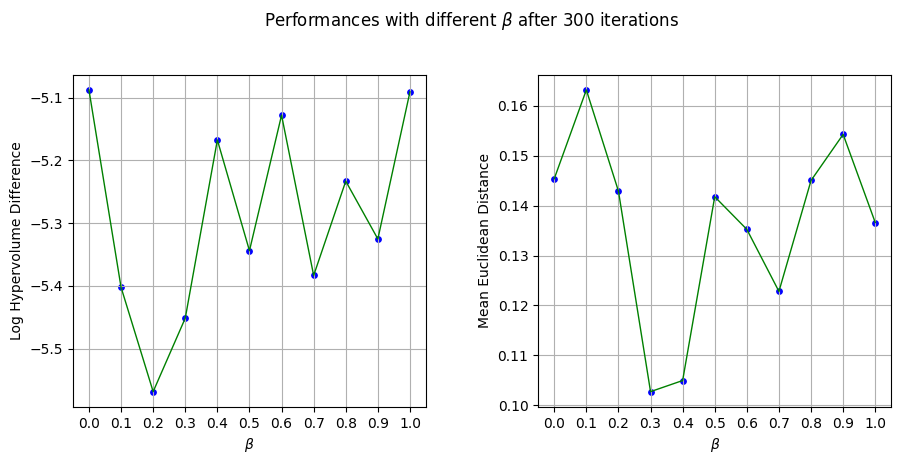

In [5]:
fig, axs = plt.subplots(figsize = (10, 5), ncols = 2, nrows=1, layout="constrained")
axs = axs.flatten()
fig.tight_layout(pad=5.0)

axs[0].plot(x_axis, y_axis, color='green', linewidth=1)
axs[0].scatter(x_axis, y_axis, color='blue', s = 15, zorder = 1)
axs[0].grid()
axs[0].set_ylabel("Log Hypervolume Difference")
axs[0].set_xticks(np.arange(start, stop, step))
axs[0].set_xticklabels(np.arange(start, stop, step)/10)
axs[0].set_xlabel(r"$\beta$")


axs[1].plot(x_axis2, y_axis2, color='green', linewidth=1)
axs[1].scatter(x_axis2, y_axis2, color='blue', s = 15, zorder = 1)
axs[1].grid()
axs[1].set_xticks(np.arange(start, stop, step))
axs[1].set_xticklabels(np.arange(start, stop, step)/10)
axs[1].set_xlabel(r"$\beta$")
axs[1].set_ylabel("Mean Euclidean Distance")
fig.suptitle(r"Performances with different $\beta$ after 300 iterations")
plt.savefig("visualization_plot/Ablation_beta_final.pdf", bbox_inches='tight')
plt.show()

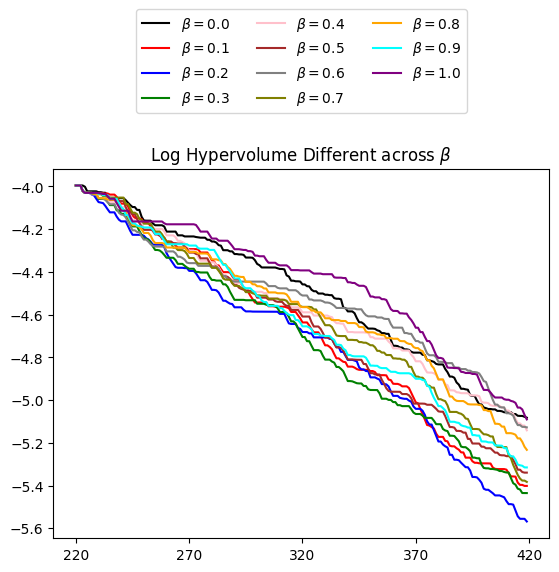

In [6]:
for beta in range(start, stop, step):
    Y_solution = np.load(f'{log_dir}/evaluation_DTLZ2_Y_6_2_stage_{beta}_controllable.npy')
    y_axis = []
    for i in range(220, n_evaluation):
        HV_score = np.log(np.clip(max_HV - hv(Y_solution[:i]), a_min=1e-14, a_max=max_HV))
        y_axis.append(HV_score)
    plt.plot(y_axis, color = color_code[beta], label = r'$\beta=$'f'{beta/10}')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=3)    
plt.xticks(np.arange(0, 201, 50), np.arange(220, n_evaluation + 1, 50))
plt.title(r'Log Hypervolume Different across $\beta$')
plt.show()

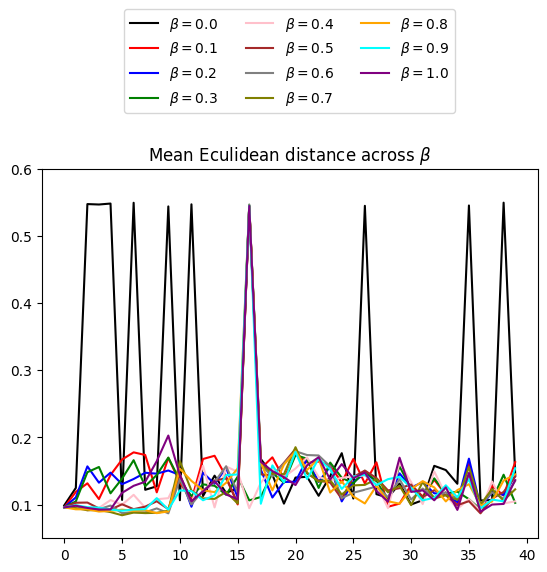

In [7]:
for beta in range(start, stop , step):
    MED_score = []
    front_value = np.load(f"{log_dir}/front_DTLZ2_6_2_stage_{beta}_controllable.npy")
    for i in range(40):
        MED_score.append(mean_Euclidean_dist(f_truth, front_value[i]))
    plt.plot(MED_score, color = color_code[beta], label = r'$\beta=$'f'{beta/10}')
plt.ylim([0.05, 0.6])
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.45), ncols=3)   
plt.title(r'Mean Eculidean distance across $\beta$')
plt.show()